# Introduction to Data Mining
## Final Project - Online Customers
### Ali Mojahed 9812762554
### Amirreza Samari 9822762186


# 1. Import Usual Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# 2. Download and Load Dataset

In [6]:
!wget -O dataset.csv https://www.dropbox.com/s/td8fv8pjw5cu78w/online%20store%20customer.csv?dl=0

--2023-07-04 03:27:28--  https://www.dropbox.com/s/td8fv8pjw5cu78w/online%20store%20customer.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/td8fv8pjw5cu78w/online%20store%20customer.csv [following]
--2023-07-04 03:27:28--  https://www.dropbox.com/s/raw/td8fv8pjw5cu78w/online%20store%20customer.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca048b8efce2b85b68db33a300e.dl.dropboxusercontent.com/cd/0/inline/B_Pr8Uk5xhmFE7kIwkB8S6fq6MLnrcJSjpVfsdEGDXIpwg9XWHJ3CyWbYujdo7ZzorZEP7Vq-6OIVxSO-BJ2OWWlBZQuQ7ktrfPKgL2qcdvL2EjWH2-xQYIm71KnKAFuYc_BVJzvfQ09iut5mQpZHGCC-DZ2m1qN9UAiIoBX4Mk9ZA/file# [following]
--2023-07-04 03:27:28--  https://uca048b8efce2b85b68db33a300e.dl.dropboxusercontent.com/cd/0/inline/B_Pr8Uk5xhmFE7kIwkB8S6fq

In [7]:
df = pd.read_csv("./dataset.csv")
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


# 3. Preprocessing

## 3.1 Handling Missing Values

for numerical columns like `Age` and `Amount_spent` we use `mean` of values and for other columns we use `most frequent` value[link text]

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'] = df['Age'].astype(int)
df['Amount_spent'].fillna(df['Amount_spent'].mean(), inplace=True)

for column in df.columns:
    if column not in ['Age', 'Amount_spent']:
        most_frequent_value = df[column].mode()[0]
        df[column].fillna(most_frequent_value, inplace=True)



In [9]:
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19,Single,Kansas,Basic,Unemployment,Other,1.0,2051.360000
1,1/1/2019,151201,Male,49,Single,Illinois,Basic,self-employed,Card,0.0,544.040000
2,1/1/2019,151202,Male,63,Married,New Mexico,Basic,workers,PayPal,1.0,1572.600000
3,1/1/2019,151203,Female,18,Single,Virginia,Platinum,workers,Card,1.0,1199.790000
4,1/1/2019,151204,Male,27,Single,Connecticut,Basic,self-employed,Card,0.0,1418.422577


## 3.2 Removing Outlier values

### 3.2.1 Using IQR Boundaries
to do so we define a range as below for `Amount_spent` and remove values outside of this boundary

```
upper = Q3 + 1.5*IQR

lower = Q1 - 1.5*IQR
```

but with this approach we can not find any outlier

In [10]:
old_df_shape = df.shape

Q1 = df['Amount_spent'].quantile(0.25)
Q3 = df['Amount_spent'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Amount_spent']>=upper)[0]
lower_array = np.where(df['Amount_spent']<=lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

new_df_shape = df.shape
print(f"old shape {old_df_shape}, new shape {new_df_shape}")

old shape (2512, 11), new shape (2512, 11)


### 3.2.2 Using Z-Score

```
Zscore = (data_point -mean) / std. deviation

```

but with a very low threshold

In [11]:
from scipy import stats
z = np.abs(stats.zscore(df['Amount_spent']))
z_score_outliers = np.where(z > 1.8)[0]
df.drop(index=z_score_outliers, inplace=True)
df.shape

(2440, 11)

## 3.3 Convert Categorical Data to One-Hot Encoding

In [12]:
categorical_cols = ['Gender', 'Marital_status', 'Segment', 'Employees_status', 'Payment_method']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df = pd.concat([df, df_encoded], axis=1)


In [13]:
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,...,Segment_Missing,Segment_Platinum,Segment_Silver,Employees_status_Employees,Employees_status_Unemployment,Employees_status_self-employed,Employees_status_workers,Payment_method_Card,Payment_method_Other,Payment_method_PayPal
0,1/1/2019,151200,Female,19,Single,Kansas,Basic,Unemployment,Other,1.0,...,0,0,0,0,1,0,0,0,1,0
1,1/1/2019,151201,Male,49,Single,Illinois,Basic,self-employed,Card,0.0,...,0,0,0,0,0,1,0,1,0,0
2,1/1/2019,151202,Male,63,Married,New Mexico,Basic,workers,PayPal,1.0,...,0,0,0,0,0,0,1,0,0,1
3,1/1/2019,151203,Female,18,Single,Virginia,Platinum,workers,Card,1.0,...,0,1,0,0,0,0,1,1,0,0
4,1/1/2019,151204,Male,27,Single,Connecticut,Basic,self-employed,Card,0.0,...,0,0,0,0,0,1,0,1,0,0


## 3.4 Normalize Amount Spent

In [18]:
df = df.loc[:,~df.columns.duplicated()].copy()
min_amount = df['Amount_spent'].min()
max_amount = df['Amount_spent'].max()

df['Amount_spent_n'] = (df['Amount_spent'] - min_amount) / (max_amount - min_amount)

# 4. Phase 1: Compare amount spent with mean of amount by employee state

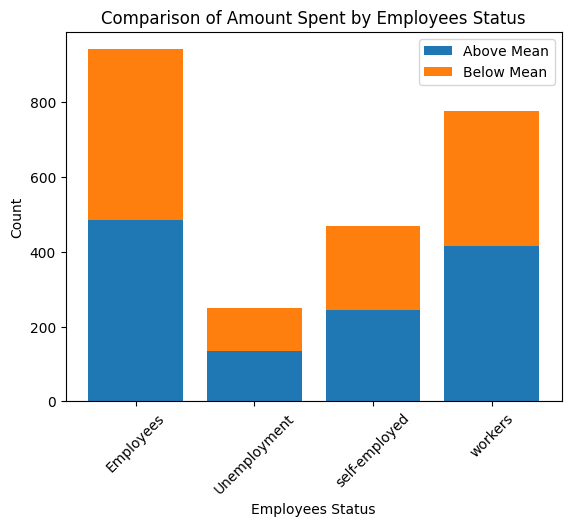

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


mean_amount_spent = df.groupby('Employees_status')['Amount_spent'].mean().to_dict()

above_mean_counts = {}
below_mean_counts = {}

for index, row in df.iterrows():
    employees_status = row['Employees_status']
    amount_spent = row['Amount_spent']
    threshold = mean_amount_spent[employees_status]
    amount_spent = amount_spent

    if amount_spent > threshold:
        above_mean_counts[employees_status] = above_mean_counts.get(employees_status, 0) + 1
        row['Above_Mean'] = True
    else:
        below_mean_counts[employees_status] = below_mean_counts.get(employees_status, 0) + 1
        row['Above_Mean'] = False

employees_status_labels = list(mean_amount_spent.keys())
above_mean_values = [above_mean_counts.get(status, 0) for status in employees_status_labels]
below_mean_values = [below_mean_counts.get(status, 0) for status in employees_status_labels]

plt.bar(employees_status_labels, above_mean_values, label='Above Mean')
plt.bar(employees_status_labels, below_mean_values, bottom=above_mean_values, label='Below Mean')
plt.axhline(0, color='gray', linewidth=0.8)
plt.xlabel('Employees Status')
plt.ylabel('Count')
plt.title('Comparison of Amount Spent by Employees Status')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [24]:
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,...,Segment_Platinum,Segment_Silver,Employees_status_Employees,Employees_status_Unemployment,Employees_status_self-employed,Employees_status_workers,Payment_method_Card,Payment_method_Other,Payment_method_PayPal,Amount_spent_n
0,1/1/2019,151200,Female,19,Single,Kansas,Basic,Unemployment,Other,1.0,...,0,0,0,1,0,0,0,1,0,0.702360
1,1/1/2019,151201,Male,49,Single,Illinois,Basic,self-employed,Card,0.0,...,0,0,0,0,1,0,1,0,0,0.185746
2,1/1/2019,151202,Male,63,Married,New Mexico,Basic,workers,PayPal,1.0,...,0,0,0,0,0,1,0,0,1,0.538272
3,1/1/2019,151203,Female,18,Single,Virginia,Platinum,workers,Card,1.0,...,1,0,0,0,0,1,1,0,0,0.410496
4,1/1/2019,151204,Male,27,Single,Connecticut,Basic,self-employed,Card,0.0,...,0,0,0,0,1,0,1,0,0,0.485429


# 5. Phase 2: Extract Frequent Patterns

In [26]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


columns_of_interest = ['Gender', 'Marital_status', 'State_names', 'Payment_method', 'Amount_spent']
df_selected = df[columns_of_interest].copy()


df_selected['Amount_spent'] = pd.qcut(df_selected['Amount_spent'], q=4, labels=["q1", "q2", "q3", "q4"])

df_selected = df_selected.astype(str)
df_encoded = pd.get_dummies(df_selected, columns=columns_of_interest)

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

frequent_itemsets

,support,itemsets
0,0.550820,(Gender_Female)
1,0.449180,(Gender_Male)
2,0.588115,(Marital_status_Married)
3,0.411885,(Marital_status_Single)
4,0.300000,(Payment_method_Card)
5,0.236885,(Payment_method_Other)
6,0.463115,(Payment_method_PayPal)
7,0.250000,(Amount_spent_q1)
8,0.339754,(Amount_spent_q2)
9,0.160246,(Amount_spent_q3)


In [27]:
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Marital_status_Single),(Gender_Female),0.411885,0.550820,0.231148,0.561194,1.018834,0.004273,1.023642
1,(Gender_Female),(Marital_status_Single),0.550820,0.411885,0.231148,0.419643,1.018834,0.004273,1.013367
2,(Payment_method_Card),(Gender_Female),0.300000,0.550820,0.175820,0.586066,1.063988,0.010574,1.085149
3,(Gender_Female),(Payment_method_Card),0.550820,0.300000,0.175820,0.319196,1.063988,0.010574,1.028197
4,(Gender_Female),(Amount_spent_q1),0.550820,0.250000,0.138934,0.252232,1.008929,0.001230,1.002985
5,(Amount_spent_q1),(Gender_Female),0.250000,0.550820,0.138934,0.555738,1.008929,0.001230,1.011070
6,(Gender_Female),(Amount_spent_q4),0.550820,0.250000,0.139344,0.252976,1.011905,0.001639,1.003984
7,(Amount_spent_q4),(Gender_Female),0.250000,0.550820,0.139344,0.557377,1.011905,0.001639,1.014815
8,(Gender_Male),(Marital_status_Married),0.449180,0.588115,0.268443,0.597628,1.016175,0.004273,1.023642
9,(Marital_status_Married),(Gender_Male),0.588115,0.449180,0.268443,0.456446,1.016175,0.004273,1.013367


# 6. Phase 3: Clustering and Classification

## 6.1 Clustering

### 6.1.1 Clustering Algorithms

we use the columns that specify for frequent patterns. the clusterings are done by kmeans with k = 3 and dbscan algorithms. the expriments are shown that the kmeans has better accuracy

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


selected_columns = ['Gender', 'Marital_status', 'State_names', 'Payment_method', 'Amount_spent_n']
df_selected = df[selected_columns]

df_encoded = pd.get_dummies(df_selected, columns=['Gender', 'Marital_status', 'State_names', 'Payment_method'])
print(df_encoded.columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(scaled_data)

pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(scaled_data)

Index(['Amount_spent_n', 'Gender_Female', 'Gender_Male',
       'Marital_status_Married', 'Marital_status_Single',
       'State_names_Alabama', 'State_names_Alaska', 'State_names_Arizona',
       'State_names_Arkansas', 'State_names_California',
       'State_names_Colorado', 'State_names_Connecticut',
       'State_names_Delaware', 'State_names_Florida', 'State_names_Georgia',
       'State_names_Hawaii', 'State_names_Idaho', 'State_names_Illinois',
       'State_names_Indiana', 'State_names_Iowa', 'State_names_Kansas',
       'State_names_Kentucky', 'State_names_Louisiana', 'State_names_Maine',
       'State_names_Maryland', 'State_names_Massachusetts',
       'State_names_Michigan', 'State_names_Minnesota',
       'State_names_Mississippi', 'State_names_Missouri',
       'State_names_Montana', 'State_names_Nebraska', 'State_names_Nevada',
       'State_names_New Hampshire', 'State_names_New Jersey',
       'State_names_New Mexico', 'State_names_New York',
       'State_names_North 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 6.1.1 Clustering Results With PCA

for better visualization we make use of dimentionality reduction methods (we use PCA) and plot the 2d and 3d space of our clustering result. the visulization may be inaccurate due to dimetionality reduction

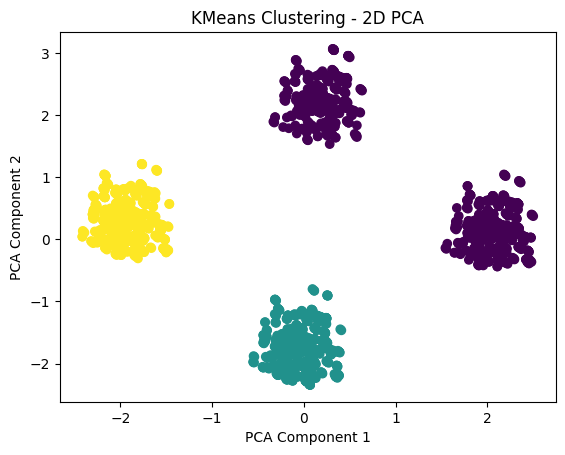

In [38]:
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering - 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

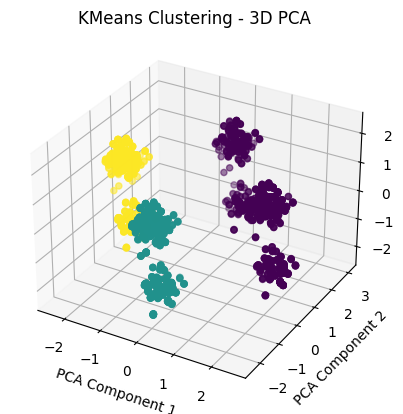

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2], c=kmeans_labels)
ax.set_title('KMeans Clustering - 3D PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

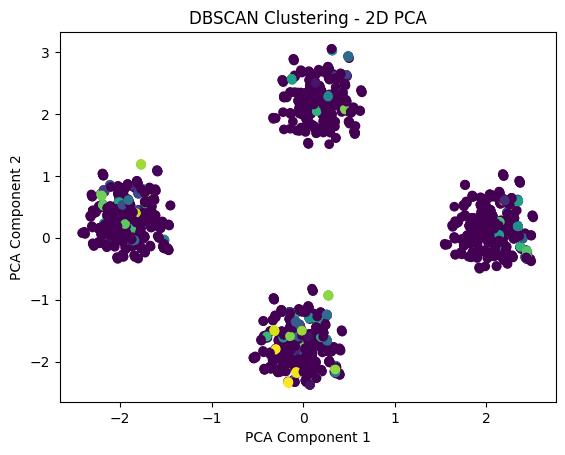

In [50]:
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering - 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

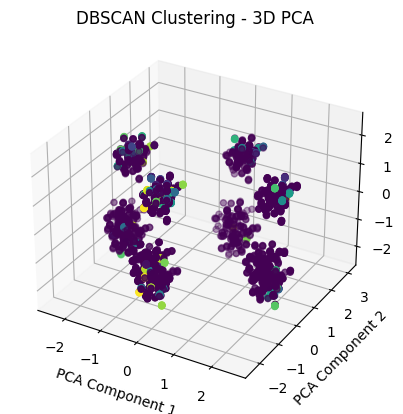

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2], c=dbscan_labels)
ax.set_title('DBSCAN Clustering - 3D PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

## 6.2 Classification

we classify the label of segment for each customer by their referal flag and amount spent. we use normalized amount spent values to avoid gradient exploiding issues.

### 6.2.2 Split train and test data

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

selected_columns = ['Referal', 'Amount_spent', 'Segment']
df_selected = df[selected_columns]

df_selected['Segment'] = pd.Categorical(df_selected['Segment'])
df_selected['Segment_encoded'] = df_selected['Segment'].cat.codes

X = df_selected[['Referal', 'Amount_spent']]
y = df_selected['Segment_encoded']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



0       0
1       0
2       0
3       3
4       0
       ..
2507    3
2508    4
2509    0
2510    0
2511    4
Name: Segment_encoded, Length: 2440, dtype: int8


<ipython-input-90-0a44efb936dc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Segment'] = pd.Categorical(df_selected['Segment'])
<ipython-input-90-0a44efb936dc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Segment_encoded'] = df_selected['Segment'].cat.codes


### 6.2.3 Classification usin Decision Tree

In [91]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

print(classification_report(y_test, dt_y_pred))


              precision    recall  f1-score   support

           0       0.44      0.50      0.47       224
           1       0.16      0.10      0.13        48
           2       0.15      0.12      0.13        41
           3       0.15      0.15      0.15        81
           4       0.13      0.13      0.13        94

    accuracy                           0.30       488
   macro avg       0.21      0.20      0.20       488
weighted avg       0.28      0.30      0.29       488



In [92]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, dt_y_pred))

0.3012295081967213


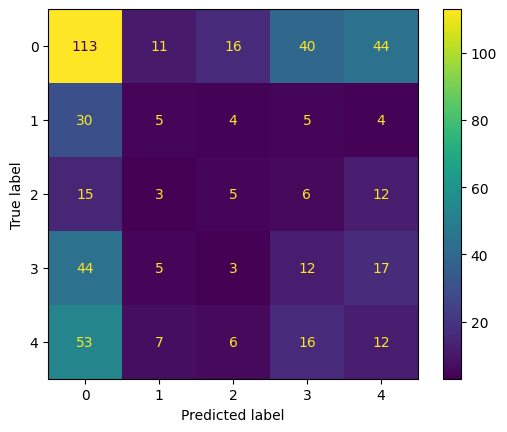

In [93]:
cm = confusion_matrix(y_test, dt_y_pred, labels=dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt_clf.classes_)
disp.plot()

### 6.2.4 Classification usin Random Forest

In [94]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_report = classification_report(y_test, rf_y_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.44      0.49      0.46       224
           1       0.12      0.08      0.10        48
           2       0.17      0.12      0.14        41
           3       0.15      0.15      0.15        81
           4       0.11      0.12      0.12        94

    accuracy                           0.29       488
   macro avg       0.20      0.19      0.19       488
weighted avg       0.27      0.29      0.28       488



In [95]:
print(accuracy_score(y_test, rf_y_pred))

0.2889344262295082


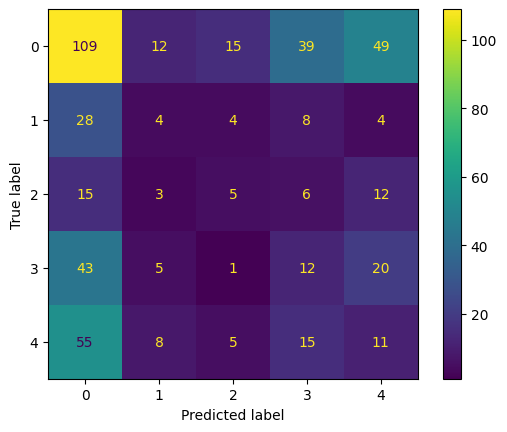

In [96]:
cm = confusion_matrix(y_test, rf_y_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_clf.classes_)
disp.plot()

### 6.2.5 Classification usin Naive Bayes

In [97]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_y_pred = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_y_pred)
print(nb_report)

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       224
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        94

    accuracy                           0.46       488
   macro avg       0.09      0.20      0.13       488
weighted avg       0.21      0.46      0.29       488



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
print(accuracy_score(y_test, nb_y_pred))

0.45901639344262296


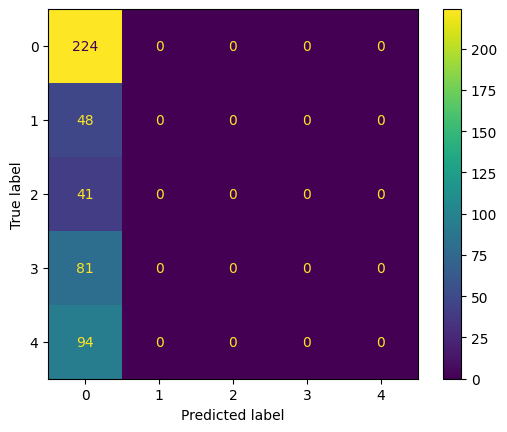

In [99]:
cm = confusion_matrix(y_test, nb_y_pred, labels=nb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nb_clf.classes_)
disp.plot()

### 6.2.6 Classification usin SVM

In [75]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_y_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       224
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        94

    accuracy                           0.46       488
   macro avg       0.09      0.20      0.13       488
weighted avg       0.21      0.46      0.29       488



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print(accuracy_score(y_test, svm_y_pred))

0.45901639344262296


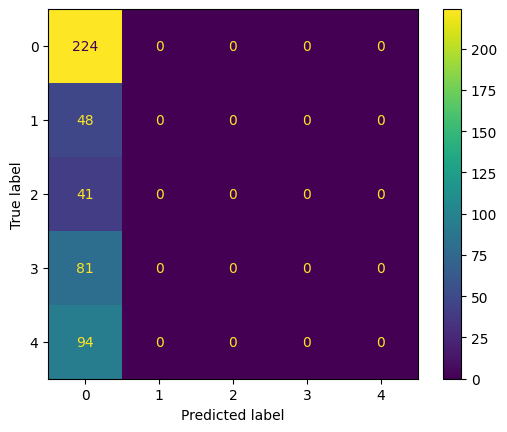

In [78]:
cm = confusion_matrix(y_test, svm_y_pred, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm_clf.classes_)
disp.plot()

### 6.2.7 Classification usin K-Nearest Neighbors

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)
knn_report = classification_report(y_test, knn_y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.46      0.78      0.58       224
           1       0.05      0.02      0.03        48
           2       0.17      0.05      0.08        41
           3       0.08      0.04      0.05        81
           4       0.13      0.05      0.08        94

    accuracy                           0.38       488
   macro avg       0.18      0.19      0.16       488
weighted avg       0.27      0.38      0.30       488



In [88]:
print(accuracy_score(y_test, knn_y_pred))

0.3790983606557377


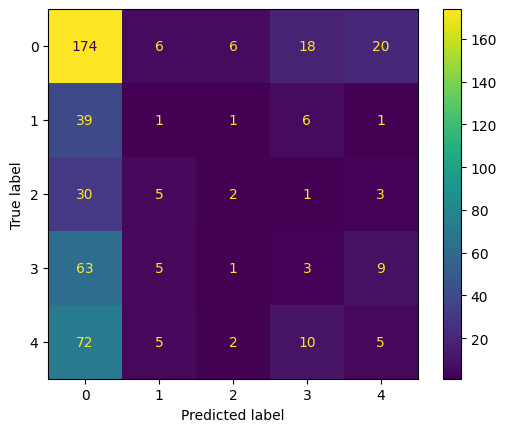

In [89]:
cm = confusion_matrix(y_test, knn_y_pred, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn_clf.classes_)
disp.plot()

### 6.2.8 Classification usin Gradient Boosting

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
gb_report = classification_report(y_test, gb_y_pred)
print(gb_report)

              precision    recall  f1-score   support

           0       0.45      0.84      0.58       224
           1       0.28      0.10      0.15        48
           2       0.15      0.05      0.07        41
           3       0.17      0.04      0.06        81
           4       0.06      0.01      0.02        94

    accuracy                           0.41       488
   macro avg       0.22      0.21      0.18       488
weighted avg       0.29      0.41      0.30       488



In [101]:
print(accuracy_score(y_test, gb_y_pred))

0.4098360655737705


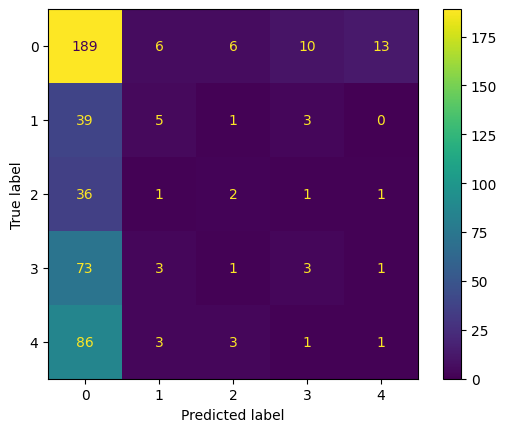

In [102]:
cm = confusion_matrix(y_test, gb_y_pred, labels=gb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gb_clf.classes_)
disp.plot()